In [3]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import subprocess
import os

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters
from MopsResults import MopsResults

% matplotlib inline

In [4]:
dataDrive = "/Volumes/DataCenter/"
dataLocation = "neosimData/ldm156/fullsky5year.db"
subsampleLocation = "neosimData/ldm156_subsample/"
runLocation = dataDrive + subsampleLocation + "subsampleRun/"

In [10]:
con = sql.connect(dataDrive + dataLocation)

In [5]:
full = pd.read_sql_query("""
SELECT * FROM withAstromErr
ORDER BY RANDOM()
LIMIT 10000
""", con)

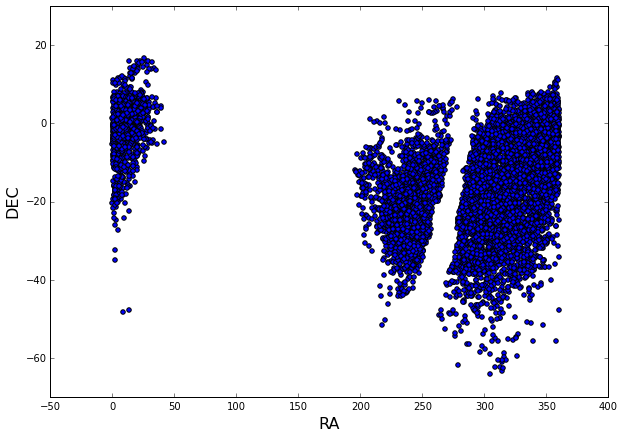

In [6]:
MopsPlotter.plotDataframe(full)

In [7]:
mjd = [51029,51065]
ra = [300,302]
dec = [-20,-18]
nights = mjd[1]-mjd[0]

In [8]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %f AND %f) AND (dec BETWEEN %f and %f) AND (ra BETWEEN %f AND %f)
""" % (mjd[0], mjd[1], dec[0], dec[1], ra[0], ra[1]), con)

In [9]:
len(ssmids['ssmid'])

6017

In [10]:
obj_num = 5000

In [11]:
num_ssm = random.sample(ssmids['ssmid'], obj_num)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [12]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s
""" % (sample), con, index_col='diaid')

In [13]:
objs

,obshistid,ssmid,ra,dec,mjd,mag,snr
diaid,,,,,,,
125353,88649541,1198169,305.369532,-12.987362,51029.237888,20.278650,15.567896
125824,88649541,10175757,306.450626,-13.340201,51029.237888,21.151320,6.968863
133637,88649572,1198169,305.367528,-12.988985,51029.247723,20.278823,12.409687
134023,88649572,10175757,306.448617,-13.341836,51029.247723,21.151498,5.555086
137519,88649587,1198169,305.366708,-12.989649,51029.251747,20.278894,13.071715
137926,88649587,10175757,306.447795,-13.342505,51029.251747,21.151571,5.851426
139012,88649592,3501863,303.413927,-15.636296,51029.253088,19.681078,22.172715
139030,88649592,4050589,303.128855,-15.784703,51029.253088,20.790819,7.978521
139296,88649594,1198169,305.366344,-12.989944,51029.253535,20.278925,13.105089


In [5]:
subsampleData = dataDrive + subsampleLocation + "subsampledata.txt"

In [15]:
objs.to_csv(subsampleData, sep=" ", header=False, index='diaid')

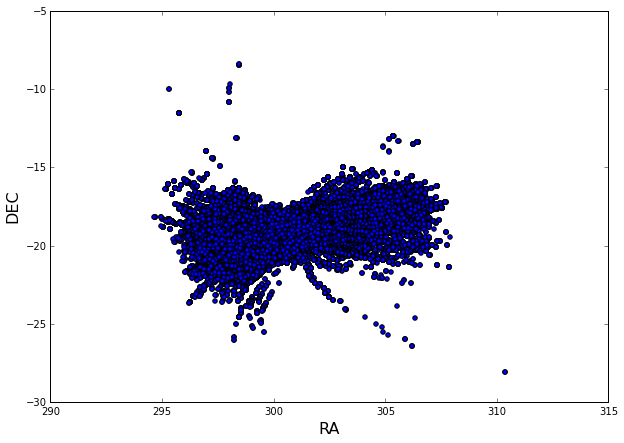

In [16]:
MopsPlotter.plotDataframe(objs)

In [17]:
nightly = dataDrive + subsampleLocation + "nightly/"

! rm -rf {nightly}
! mkdir {nightly}

In [18]:
call = ["python", os.getenv("MOPS_DIR") + "/bin/splitByNight.py", "-n", nightly, subsampleData]
subprocess.call(call);

In [19]:
parameters = MopsParameters()
tracker = MopsTracker(runLocation)
tracker.getDetections(nightly)

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets (tracklets) ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	Detection error threshold:                0.0004
	Maximum right ascension acceleration:     0.02
	Maximum declination acceleration: 

In [20]:
parameters, tracker = runMops.runMops(parameters, tracker, overwrite=True)

------- Run MOPS -------
Running LSST's Moving Object Pipeline

Overwrite triggered: clearing tracker...

Found 17 detection files in /Volumes/DataCenter/neosimData/ldm156_subsample/nightly/.

Overwrite triggered: deleting existing directory...

Saving parameters to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/parameters.yaml

------- Run MOPS -------
Running findTracklets...
Completed running findTracklets.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracker.yaml

------- Run MOPS -------
Running idsToIndices.py...
Completed running idsToIndices.py.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracker.yaml

------- Run MOPS -------
Running collapseTracklets...
Completed running collapseTracklets.

------- Run MOPS -------
Running indicesToIds.py...
Completed running indicesToIds.py.

Saving tracker to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracker.yaml

------- Run MOPS -------

In [6]:
parameters = MopsParameters.fromYaml(runLocation + "parameters.yaml")
tracker = MopsTracker.fromYaml(runLocation + "tracker.yaml")

Loading parameters from /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/parameters.yaml
Loading tracker from /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/tracker.yaml


In [6]:
results = MopsAnalysis.analyze(parameters, tracker, fullDetFile=subsampleData, overwrite=True)

Overwrite triggered: deleting existing results directory...

Initializing new results object...
Creating DiaSources table...
Creating AllObjects table...
Creating FoundObjects view...
Creating MissedObjects view...
Creating AllTracklets table...
Creating TrackletMembers table...
Creating Tracklets view...
Creating CollapsedTracklets view...
Creating PurifiedTracklets view...
Creating FinalTracklets view...

Reading full detections file into dataframe...
Counting findable objects as tracklets...
Counting findable objects as tracks...
Building objects dataframe...
Updating objects dataframe...
Reading full detections file into database...
Starting tracklet analysis for night 51029 at Fri Mar 18 15:06:41 2016

- Writing results to /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51029.results
- Checking file sizes...
- Reading input detections...
- Counting findable objects...
- Updating results object...
Saving results to /Volumes/DataCenter/neosimData/ldm156_subsampl

In [7]:
results = MopsResults.fromYaml(runLocation + "results.yaml")

Loading results from /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results.yaml


In [9]:
import MopsDatabase
import MopsPlotter

In [10]:
con = sql.connect(tracker.mainDatabase)
window_dbs = MopsDatabase.attachDatabases(con, tracker.windowDatabases)

Proceeding with the first 10 databases...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51029-51044.db to con as db0...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51030-51045.db to con as db1...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51033-51048.db to con as db2...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51034-51049.db to con as db3...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51036-51051.db to con as db4...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51041-51056.db to con as db5...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51044-51056.db to con as db6...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun/results/51045-51060.db to con as db7...
Attaching /Volumes/DataCenter/neosimData/ldm156_subsample/subsampleRun

In [11]:
results.performanceRatio

{'51029-51044': 0.6562948779320249,
 '51030-51045': 0.9506964404156534,
 '51033-51048': 0.9815806382523025,
 '51034-51049': 0.9837224245020347,
 '51036-51051': 0.9850074962518741,
 '51041-51056': 0.9856500321267937,
 '51044-51056': 0.9646519746890683,
 '51045-51060': 0.9680018961839298,
 '51046-51061': 0.9469650521152667,
 '51048-51061': 0.8212945590994372,
 '51049-51061': 0.8208333333333333,
 '51050-51061': 0.5944841675178754,
 '51051-51061': 0.23693379790940766,
 '51055-51061': 0.15577889447236182,
 '51056-51061': 0.17415730337078653}

In [12]:
missed_objects = pd.read_sql("""SELECT objectId FROM AllObjects
                                    WHERE findableAsTrack = 1
                                    AND numTrueTracks = 0""", con)["objectId"].values
found_objects = pd.read_sql("""SELECT objectId FROM AllObjects
                                    WHERE findableAsTrack = 1
                                    AND numTrueTracks >= 1""", con)["objectId"].values
missed_objects_detections = MopsDatabase.findDetectionsWithObjectIds(con, missed_objects)
found_objects_detections = MopsDatabase.findDetectionsWithObjectIds(con, found_objects)

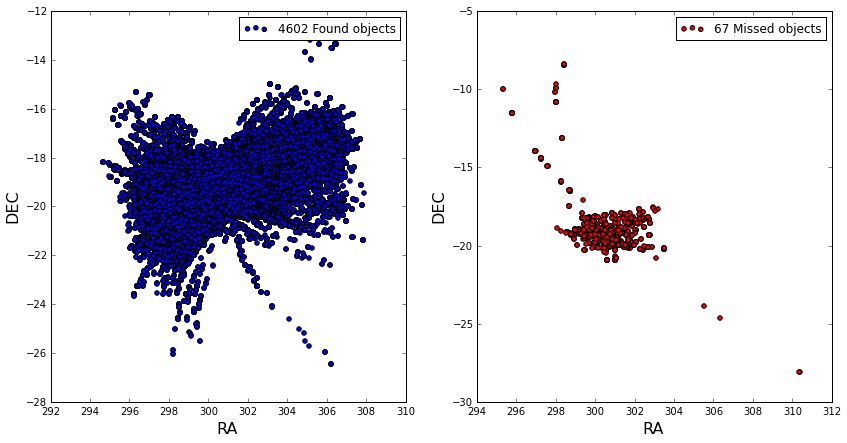

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,7)

ax[0].scatter(found_objects_detections["ra"], found_objects_detections["dec"], c="b", label="%s Found objects" % len(found_objects))
ax[1].scatter(missed_objects_detections["ra"], missed_objects_detections["dec"], c="r",  label="%s Missed objects" % len(missed_objects))

for a in ax:
    a.legend()
    a.set_xlabel("RA", size=16);
    a.set_ylabel("DEC", size=16);   

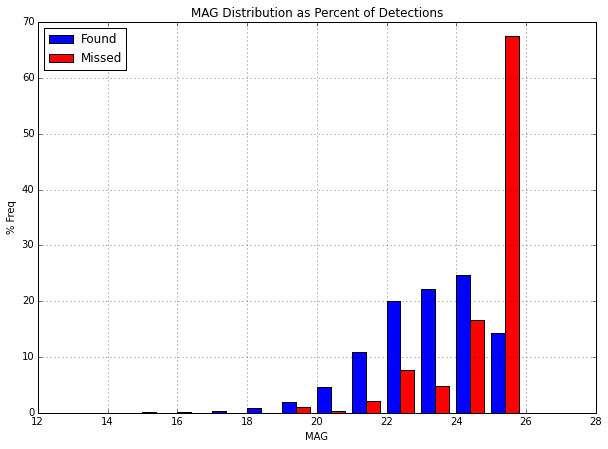

In [14]:
hist, bin_edges = np.histogram(found_objects_detections["mag"].values, bins=np.linspace(12,26,15))
hist2, bins = np.histogram(missed_objects_detections["mag"].values, bins=bin_edges)
width = 0.4

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,7)
ax.bar(bin_edges[1:], hist/float(len(found_objects_detections))*100.0, width, label="Found")
ax.bar(bin_edges[1:] + width, hist2/float(len(missed_objects_detections))*100.0, width, color="r", label="Missed")
#ax.set_xticks(bin_edges[1:]);
ax.legend(loc="upper left");
ax.grid();
ax.set_title("MAG Distribution as Percent of Detections");
ax.set_xlabel("MAG");
ax.set_ylabel("% Freq");